# header file included

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import PorterStemmer         
snow = nltk.stem.SnowballStemmer('english')

print('done')

done


# data loading

In [4]:
data = pd.read_csv('travel_science_food_manufacturing_history_art_18_5_19_withDuplicate.csv')
data.head()

,Video id,Title,Description,Category
0,DU1BEo2GlnM,Day 193.2 Did Gulftainer Missiles Travel To I...,https://www.timesofisrael.com/former-mk-says-i...,travel
1,XatWIV-bWnA,Travel Hacks | Collab With Heyitsjemma,Hey hope you guys enjoyed I know this video is...,travel
2,p0-Sa6hK9ZU,Khánh Linh Travel #1 | Hạng Thương Gia Bamboo ...,Khánh Linh Travel Vlogs | Hạng Thương Gia Bamb...,travel
3,egjqs_6zvno,BEST VIDEO OF Lefkada | 2018 - HOLIDAY | Greec...,Subskrybuj mój kanał :) Instagram: https://www...,travel
4,abH6pFIp--Y,Vlog 7 | Traveling | Packing & Storms | New Ad...,"A hectic week, packing, teaching and getting a...",travel


In [7]:
data.columns

Index([u'Video id', u'Title', u'Description', u'Category'], dtype='object')

# initial count of each category comments

/home/mint/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


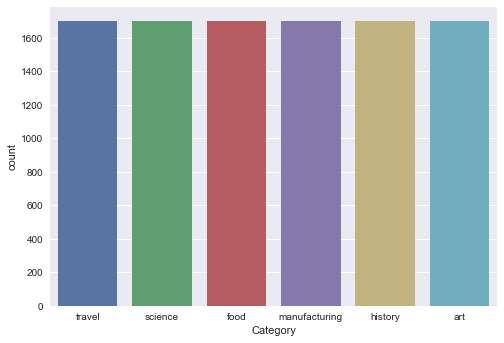

In [4]:
sb.countplot(data=data, x='Category')
plt.show()

In [5]:
# 
data.dropna(inplace=True)

In [6]:
data.shape

(9816, 4)

In [7]:
# any duplicate rows
data.drop_duplicates(inplace=True)

In [8]:
# print(type(data))
data.shape

(1870, 4)

# Category count after duplicate and nan removal rows from datasets

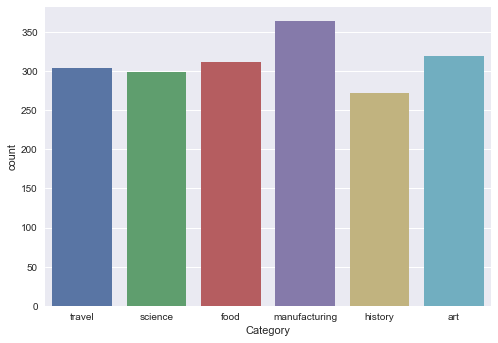

In [9]:
sb.countplot(data=data, x='Category')
plt.show()

In [80]:
# stop

In [81]:
# def remove_stopWords(s):
#     s = ' '.join(word for word in s.split() if word not in stop)
#     return s


# preprocessing function

In [100]:
def preprocess(words):
    words = words.lower()
#     for word in words:
#         print(word)
#         break
    words = re.sub(r"what's", "what is ",words)
    words = re.sub(r"can't", "cannot ",words)
    words = re.sub(r"n't", " not ",words)
    words = re.sub(r"i'm", "i am ",words)

    words = re.sub('\W', ' ',words)  # to remove otherthan [a-zA-Z0-9_] 
    words = re.sub('_', '', words)
    words = re.sub('\d+', '', words)# to remove number
    
    #words = remove_stopWords(words)
    
    # doing stemming and stopword removal together
    words = ' '.join([snow.stem(word) for word in words.split() if word not in stop]) # to remove stopwords

    words = words.strip(' ')

    return words

# preprocessing on 'Title' part of dataset

In [104]:
data['Title'] = data['Title'].map(lambda com: preprocess(com))
print(data['Title'].head(10))

0                day gulftain missil travel iran ferri
1                       travel hack collab heyitsjemma
2    kh nh linh travel h ng th ng gia bamboo airway...
3    best video lefkada holiday greec travel drone ...
4    vlog travel pack storm new addict matur beauti...
5                               ocean citi travel vlog
6    travel ireland explor malahid castl shop haile...
7                        girl camera take cali la vlog
8                           mewar udaipur travel video
9    ireland vlog photo shoot amaz view travel home...
Name: Title, dtype: object


# preprocessing on 'Description' part of dataset

In [105]:
data['Description'] = data['Description'].map(lambda com: preprocess(com))
print(data['Description'].head(10))

0    https www timesofisrael com former mk say iran...
1    hey hope guy enjoy know video bit differ fit h...
2    kh nh linh travel vlog h ng th ng gia bamboo a...
3    subskrybuj j kana instagram https www instagra...
4    hectic week pack teach get pedicur get easter ...
5    thank much watch realli hope enjoy much film e...
6    got chanc travel ireland order visit best frie...
7    visit california littl vlog place visit malibu...
8    video made akshay mathuriya https www instagra...
9    got chanc travel ireland order visit best frie...
Name: Description, dtype: object


# writing to csv file

In [106]:
data.to_csv('preprocessed_data.csv', index=False, encoding='utf-8')
print('done')

done
